## Librerie usate e installazioni

In [ ]:
!git clone https://github.com/jminuscula/dixit-online dixit_online
!git clone https://github.com/Mpinaz/Dixit_Project_MatteoPinato repository

Cloning into 'dixit_online'...
remote: Enumerating objects: 1376, done.
remote: Counting objects: 100% (66/66), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 1376 (delta 42), reused 31 (delta 18), pack-reused 1310
Receiving objects: 100% (1376/1376), 12.33 MiB | 14.84 MiB/s, done.
Resolving deltas: 100% (738/738), done.
Cloning into 'repository'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 11 (delta 2), reused 3 (delta 0), pack-reused 0
Receiving objects: 100% (11/11), 274.91 KiB | 2.67 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [ ]:
!pip install -r /content/repository/requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.5/325.5 kB 1.7 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [ ]:
import os
import random
from random import shuffle
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from transformers import BlipProcessor, BlipForConditionalGeneration,CLIPProcessor, CLIPModel
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import torch

In [ ]:
blip_processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
blip_model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")
clip_processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")
clip_model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

# **IA**

## Descrizione della carta in input

### per eliminare parole che aiuterebbero a descrivere troppo un immagine

In [ ]:
words_to_avoid=['about','a','at','of','an','it','with','but','by','for','from','in','inside','outside','into','like','near','off','on','onto','over','to','under','within','without','up','around','painting','illustration','image','the']

In [ ]:
def generate_concise_description(model, processor, image, max_length=100):
    inputs = processor(images=image, return_tensors="pt")
    out = model.generate(**inputs, max_length=max_length, num_beams=3, early_stopping=False)
    description = processor.decode(out[0], skip_special_tokens=True)
    return description

In [ ]:
def Narrator_turn_for_AI(image):
  c=generate_concise_description(blip_model, blip_processor, image).split()

  i=0
  while i<len(c):
    if c[i] in words_to_avoid:
      c.pop(i)
    else:i+=1
  return c[random.randint(0,len(c)-1)]

## Cerca la carta migliore per la descrizione ricevuta

In [ ]:
def find_best_matching_image(image_paths, target_description, blip_model, blip_processor, clip_model, clip_processor):

    images = [(mpimg.imread(image_path),i) for i,image_path in enumerate(image_paths)]

    target_inputs = clip_processor(text=target_description, return_tensors="pt", padding=True)

    target_features = clip_model.get_text_features(**target_inputs)

    best_image = None
    best_score = (-1,-1)

    for image,i in images:
        description = generate_concise_description(blip_model, blip_processor, image)
        image_inputs = clip_processor(text=description, return_tensors="pt", padding=True)
        image_features = clip_model.get_text_features(**image_inputs)

        score = (cosine_similarity(target_features.detach().numpy(), image_features.detach().numpy()),i)

        if score[0] > best_score[0]:
            best_score = score
            best_image = image

    return image_paths[best_score[1]]

# **Il Gioco**

### **Creo il mazzo**

#### Refill del mazzo di carte

In [ ]:
def refill():
  path_of_images=os.listdir('/content/dixit_online/cards')
  allcards=[]
  for i in path_of_images:
    allcards.append(f'/content/dixit_online/cards/{i}')
  return allcards

def again(old,new):
  new=old
  return new,[]

#### Controllo se l'input dell'utente è un numero consentito

In [ ]:
def check_int(num,l,r,ok=False):
  while not ok:
    try: int(num)
    except ValueError:
      print(f'must be a number between {l} and {r}')
      num=input()

    else:
      num=int(num)

      if num>r:
        print(f'max is {r} included')
        num=input()
      elif num<l:
        print(f'min is {l} included')
        num=input()
      else:return num


## **I Giocatori**

### Classe per il giocatore e l'IA

In [ ]:
discarded,turn=[],[]
end=False
tot_points=15

class Persona():

  # ogni giocatore ha punti,deck e nome, inoltre al deck vengono immediatamente aggiunte 6 carte (7 se ci sono solo 2 giocatori ed IA)
  def __init__(self,name):
    self.points=0
    self.deck=[]
    self.Name=name
    for _ in range(c):
      self.Add_card(allcards,discarded)

  # al Narratore viene 1. mostrato il deck, 2. sceglie l'indice della carta selta 3. la carta viene rimossa dal suo deck e aggiunta alla pila degli scarti 4. sceglie una descrizione per la carta giocata
  def Narrator(self):

    print(f'{self.Name}, you are the Narrator! \nchoose the card You want to play')
    self.show_deck()  #1
    print('insert number here:')
    n=check_int(input(),0,c+1)-1 #2

    card=self.deck.pop(n) #3
    discarded.append(card) #3

    print('Give a descritpion for the card you played')
    description=input() #4

    self.Add_card(allcards,discarded)
    return card,description

  # al Giocatore viene 1. mostrato il deck, 2. sceglie l'indice della carta selta 3. la carta viene rimossa dal suo deck e aggiunta alla pila degli scarti
  def Player(self,description):

    print(f'{self.Name}, you are the player! \nThis is the description you are given:\n{description} \nchoose a card')
    self.show_deck() #1
    print(f'insert the number of the card:')
    j=check_int(input(),1,c) #2
    card=self.deck.pop(j-1) #3
    discarded.append(card) #3
    self.Add_card(allcards,discarded)
    return card

  def Vote(self,cards,description,played_cards,played_cards_index):
    print(f'{self.Name} Vote a card, the description is: {description}')
    while True:
      x=check_int(input(),1,len(played_cards.keys()))-1
      if played_cards[played_cards_index[x]] == self.Name:print(f"{self.Name} you can't vote your own card, choose another one")
      else:return x


  # Funzione che serve ad aggiungere una carta al deck del Player controllando che non abbia più carte di quelle consentite in base al numero di giocatori
  def Add_card(self,allcards,discarded):

    if len(self.deck)<c:
      r=random.randint(0,len(allcards)-1)
      self.deck.append(allcards.pop(r))

  # funzione che controlla se il Player non ha più punti del necessario per la vittoria, in tal caso il gioco si conclude
  def check(self):
    if self.points>=tot_points:
      print(f"{self.Name} has won with {self.points} points!")
      return True
    else: return False

  # funzione per mostrare il deck del Player
  def show_deck(self,desc=''):
    plt.figure(figsize=(15,10))
    for a,i in enumerate(self.deck): #print ogni carta giocata

      img = mpimg.imread(i)
      plt.subplot(1, 5, a+1 )
      plt.imshow(img)
      plt.axis('off')
      if desc:plt.title(desc)
      else:plt.title(f'card N.{a+1}')


    return

  # print()
  #def __repr__(self):
  #  print(f'Player:{self.Name} \npoints:{self.points} \ncurrent deck: {len(self.deck)}\n')
  #  self.show_deck()
  #  return ''


class AI(Persona):


  def Narrator(self):

    card=self.deck.pop(random.randint(0,len(self.deck)-1))
    discarded.append(card)
    print("the IA is the Narrator! give it some time...")
    description=Narrator_turn_for_AI(mpimg.imread(card))
    self.Add_card(allcards,discarded)
    return card,description

  def Player(self,description):
    print("the IA is thinking...")
    card=find_best_matching_image(self.deck, description, blip_model, blip_processor, clip_model, clip_processor)
    print('Done')
    self.deck.remove(card)
    discarded.append(card)
    self.Add_card(allcards,discarded)
    return card

  def Vote(self,cards,description,played_cards,played_cards_index):
    print(f'{self.Name} is thinking...')
    tmp=[]
    for i in cards:
      if played_cards[i]!='IA':tmp.append(i)
    x=find_best_matching_image(tmp, description, blip_model, blip_processor, clip_model, clip_processor)
    print(f'Done')
    return played_cards_index.index(x)


### Per ogni giocatore creo una classe + la IA

In [ ]:
allcards=refill()# allcards è un array con i path di ogni carta
e={}
ok=False
n=None
print('How many players? (min 2 max 5)')

n=check_int(input(),2,5)


c=5 #ogni giocatore avrà 5 carte

# creazione dei Players
i=0
while i<n:
  print("\nWhat's your name?")
  x=input()

  if x not in e and x:
    e[x]=Persona(x)
    i+=1
  else:print('name not valid, please choose another')


e['IA']=AI('IA')

turn=[x for x in e.keys()]

Narr=turn.pop(random.randint(0,len(turn)-1)) #scegli un Narratore a caso



How many players? (min 2 max 5)
2

What's your name?
F

What's your name?
G


## **Turni**

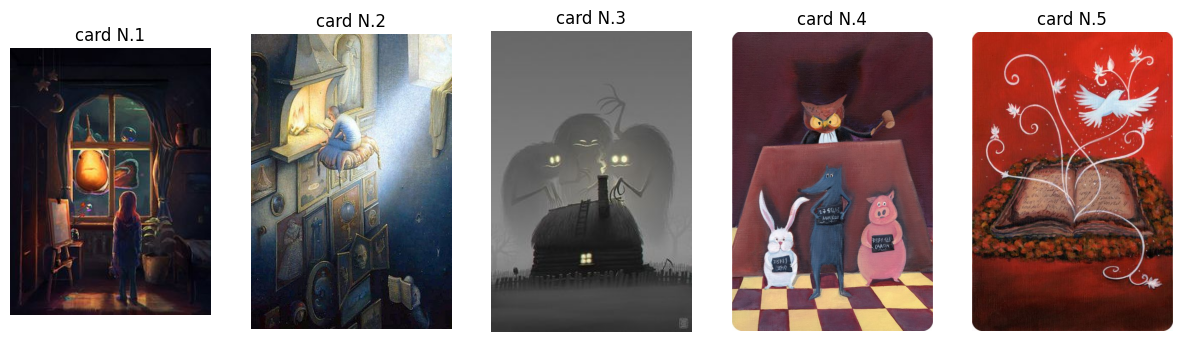

In [ ]:
def print_cards(cards,desc=''):
  plt.figure(figsize=(15,10))
  for a,i in enumerate(cards): #print ogni carta giocata

      img = mpimg.imread(i)
      plt.subplot(1, 5, a+1 )
      plt.imshow(img)
      plt.axis('off')
      if desc:plt.title(desc)
      else:plt.title(f'card N.{a+1}')

  return


F, you are the Narrator! 
choose the card You want to play


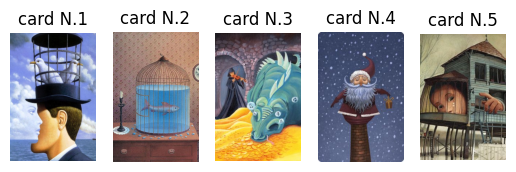

insert number here:


KeyboardInterrupt: Interrupted by user

In [ ]:
#turn nome
#e nome -> classe
card=''
description=''
end=False
counter=0


while not end:
  played_cards={}
  voting={}
  Narrator_card,description=e[Narr].Narrator() # il Narratore sceglie carta e descrizione

  if not allcards: #refill del deck in caso si sia svuotato, la pila degli scarti diventa il deck e poi si azzera
      allcards,discarded=again(discarded,allcards)

  played_cards[Narrator_card]='Narrator'
  played_cards_index=[Narrator_card]

  #played card -> player
  for p in turn:
    card=e[p].Player(description) # il ogni giocatore sceglie una carta in base alla descrizione fornita
    played_cards_index.append(card)
    played_cards[card]=e[p].Name
    if not allcards:
      allcards,discarded=again(discarded,allcards)



  played=played_cards_index
  shuffle(played)
  print_cards(played) #print ogni carta giocata


  for p in turn: #ogni Giocatore vota una carta, non può votare la sua carta, e i voti vengono salvati in nu dict con  indice carta votata: classi di chi ha votato quella carta

    x=e[p].Vote(played,description,played_cards,played_cards_index)
    if x in voting :voting[x].append(p)
    else:voting[x]=[p]



  points_to_be_assigned=[]

  for v in voting: # ogni carta votata assegna punti ai Player o al Narratore in base alle regole del gioco

    if len(voting[v])==n:
      if played_cards[played_cards_index[v]]!='Narrator':
        voting[v].points+=n
        print(f"Everyone voted for {voting[v].Name}'s card, It gets {str(n)} points!")
        break
      print(f"Everyone voted for the Narrator's card!")
      for p in turn: points_to_be_assigned.append((e[p].Name,2))
      break

    elif played_cards[played_cards_index[v]]!='Narrator':
      points_to_be_assigned.append((played_cards[played_cards_index[v]],len(voting[v])))
    else:
      points_to_be_assigned.append(('Narrator',3))
      for x in voting[v]:
        points_to_be_assigned.append((x,3))



  # svelo carta del Narratore e assegno punti a tutti
  print(f'The Narrator card was:')
  print_cards([Narrator_card],f"{e[Narr].Name}'s card")



  for p in points_to_be_assigned:
    if p[0]=='Narrator':temporary=Narr
    else:temporary=p[0]
  # print(f"{temporary} got {p[1]} points")
    e[temporary].points+=p[1]


  Winner=[]
  for x in turn+[Narr]:
      end=e[x].check()
      if end:
        Winner.append(e[x])



  # nuovo narratore
  turn.append(Narr)
  Narr=turn.pop(0)
  if end:break



  print("want a points recap? type Yes if so")
  x=input()

  if x in ['yes','Yes']:
    for x in turn+[Narr]: print(f"{e[x].Name} has {e[x].points} points")

  print('ready for next turn?')
  x=input()
  if x in ['no','No','nO','NO','Nope']:
    print('ok bye')
    break



end_line='Game is over'

if Winner:
  if len(Winner)==1:
    end_line+=f', the Winner is {Winner[0].Name} with {Winner[0].points} points!'

  else:
    end_line+=', Winners are:'
    while Winner:
      end_line+=f'{Winner[0].Name} with {Winner[0].points} points'
      Winner.pop(0)
      if len(Winner)>1: end_line+=', '
      elif len(Winner)==1: end_line+=' and '
print(end_line+'!')



